
<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=7>
Linear Algebra <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 2 <br>
<font color=696880 size=4>
<!-- <br> -->
Ashkan Majidi - Mahdi Alinejad - Keyhan Hodaei - Mohammad Mahdi Abedian - Mohammad Farhan Bahrami - Mohammadhossein salimi

____

# Personal Data

In [4]:
student_number = '401105667'
first_name = 'Amirreza'
last_name = 'Inanloo'

# Introduction

In this assignment, you will implement some Algorithms and topics which you've already learned their theoretical foundations in the class. Note that **you are not allowed to use `numpy.linalg` functions in this notebook**.

Import your needed libraries here.

In [30]:
import tester
import numpy as np
import math
import plotly.graph_objs as go
import matplotlib.pyplot as plt

# TODO: write your code here

# Q1: System of Equations (20 + 20 Points)

In this part, you are going to solve a system of equations using the Gauss-Jordan elimination method. You will also use the results to find the conic section that fits the given data points.

First, write a function that gets an augmented matrix as its input and then returns the results if the matrix could be solved using the Gauss-Jordan elimination method. If the matrix could not be solved, the function should return an appropriate error message.  

In [27]:
import numpy as np

def solve(A, b):
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    
    if A.shape[0] != b.shape[0]:
        return "Error: The number of rows in A must match the number of rows in b."
    
    augmented_matrix = np.hstack((A, b.reshape(-1, 1)))
    rows, cols = augmented_matrix.shape

    for i in range(rows):
        if augmented_matrix[i, i] == 0:
            for j in range(i + 1, rows):
                if augmented_matrix[j, i] != 0:
                    augmented_matrix[[i, j]] = augmented_matrix[[j, i]]
                    break
            else:
                return "Error: The matrix is singular and cannot be solved."

        augmented_matrix[i] = augmented_matrix[i] / augmented_matrix[i, i]

        for j in range(rows):
            if i != j:
                augmented_matrix[j] = augmented_matrix[j] - augmented_matrix[j, i] * augmented_matrix[i]

    A_reduced = augmented_matrix[:, :-1]
    b_reduced = augmented_matrix[:, -1]
    
    return b_reduced
def generate_matrices(n):
    A = np.random.randint(-10, 10, size=(n, n))
    b = np.random.randint(-10, 10, size=(n,))
    return A, b
# Example usage:
A = [
    [2, 1, -1],
    [-3, -1, 2],
    [-2, 1, 2]
]
b = [8, -11, -3]

#n = 3
#A, b = generate_matrices(n)
print("Matrix A:")
for row in A:
    print(" ".join(f"{num:.2f}" for num in row))
print("Vector b:")
for num in b:
    print(f"{num:.2f}")
result = solve(A, b)
print()
print("result :")
for num in result:
    print(f"{num:.2f}", end = " ")


Matrix A:
2.00 1.00 -1.00
-3.00 -1.00 2.00
-2.00 1.00 2.00
Vector b:
8.00
-11.00
-3.00

result :
2.00 3.00 -1.00 

Consider the [Ecliptic Coordinate System](https://en.wikipedia.org/wiki/Ecliptic_coordinate_system) in astronomy. The coordinates of a star in this system are given as $(\lambda, \beta)$, where $\lambda$ is the ecliptic longitude and $\beta$ is the ecliptic latitude. 

We will give you the position vectors of an astronomical object with respect to a distant observer for five different [true anomalies](https://en.wikipedia.org/wiki/True_anomaly).

Consider the [Conic Sections](https://en.wikipedia.org/wiki/Conic_section) in mathematics. The general form of a conic section is given as $Ax^2 + Bxy + Cy^2 + Dx + Ey + F = 0$. Every orbit of astronomical objects (such as planets, asteroids, comets, etc.) is a conic section. Conic sections are classified into four types: ellipse, parabola, hyperbola, and circle.

Fit a surface to the given points.

Surface equation: $Ax + By+ Cz + D = 0$.
We take the value of C as one, and we obtain the values of A, B, and D using the following system of equations.

\begin{align*}
\sum_{i=1}^{N} z_i &= -B \sum_{i=1}^{N} y_i - A \sum_{i=1}^{N} x_i - D N \\
\sum_{i=1}^{N} z_i y_i &= -B \sum_{i=1}^{N} y_i^2 - A \sum_{i=1}^{N} x_i y_i - D \sum_{i=1}^{N} y_i \\
\sum_{i=1}^{N} z_i x_i &= -B \sum_{i=1}^{N} x_i y_i - A \sum_{i=1}^{N} x_i^2 - D \sum_{i=1}^{N} x_i
\end{align*}



In [46]:
vectors = tester.vectors[0]
print(vectors)

[[-69.98522561 -29.6929716   -0.97627515]
 [-70.14599665 -29.71727794  -0.96350419]
 [-70.32870803 -29.86443759  -0.95875521]
 [-70.2476123  -30.38700236  -1.00888661]
 [-69.79940813 -30.38844553  -1.05014337]]
[-69.98522561 -29.6929716   -0.97627515]


In [50]:
def surface_fit(vectors):
    N = len(vectors)
    if N < 3:
        raise ValueError("At least three points are required to define a plane.")
    
    x_sum = y_sum = z_sum = x2_sum = y2_sum = xy_sum = xz_sum = yz_sum = 0
    
    for (x, y, z) in vectors:
        x_sum += x
        y_sum += y
        z_sum += z
        x2_sum += x**2
        y2_sum += y**2
        xy_sum += x * y
        xz_sum += x * z
        yz_sum += y * z
    
    # Create the augmented matrix for the system of equations
    A_matrix = [
        [x_sum, y_sum, N, -z_sum],
        [x2_sum, xy_sum, x_sum, -xz_sum],
        [xy_sum, y2_sum, y_sum, -yz_sum]
    ]
    
    # Perform Gaussian elimination to solve for A, B, and D
    for i in range(3):
        # Normalize the pivot row
        pivot = A_matrix[i][i]
        for j in range(i, 4):
            A_matrix[i][j] /= pivot
        
        # Eliminate the current variable from the other rows
        for k in range(3):
            if k != i:
                factor = A_matrix[k][i]
                for j in range(i, 4):
                    A_matrix[k][j] -= factor * A_matrix[i][j]
    
    # Extract the results
    A = A_matrix[0][3]
    B = A_matrix[1][3]
    D = A_matrix[2][3]
    C = 1
    
    return A, B, C, D

# Example usage
vectors = [
    (-69.98522561, -29.6929716, -0.976275115),
    (-70.14599665, -29.71727794, -0.965304191),
    (-70.32870883, -29.86443759, -0.958775211),
    (-70.2476123, -30.38707236, -1.088086661),
    (-69.79940813, -30.38844553, -1.051043371)
]
print(surface_fit(vectors))

(0.0006375975608620792, -0.1545606962704234, 1, -3.585779447411326)


### **From this cell to the end of Q1 Tasks are optional and have extra points.**

Retrieve the normal vector of the obtained surface.

In [9]:
def get_normal_vector(A, B, C, D):
    #TODO: return the normal vector of the surface
    pass

A, B, C, D = surface_fit(vectors)
normal_vector = get_normal_vector(A, B, C, D)
print(normal_vector)

[ 0.09178599 -0.0816893   1.        ]


[Longitude of the Ascending Node](https://en.wikipedia.org/wiki/Longitude_of_the_ascending_node#:~:text=The%20longitude%20of%20the%20ascending,in%20a%20specified%20reference%20plane): The angle measured along the ecliptic plane from the [vernal equinox](https://en.wikipedia.org/wiki/Equinox) to the point where the orbit crosses the ecliptic plane from south to north.

[Inclination](https://en.wikipedia.org/wiki/Orbital_inclination): The angle between the orbital plane of a celestial body (such as a planet or satellite) and a reference plane, usually the ecliptic plane for objects in the solar system. It is measured in degrees and indicates how tilted the orbit is relative to the reference plane.

Find Inclination and Longitude of the Ascending Node of the orbit.

In [10]:
def angle_of_vectors(u, v):
    #TODO: return the angle between two vectors u and v
    pass

def find_inclination(normal_vec):
    #TODO: return the inclination of the orbit
    #TODO: the angle between the z-axis and the normal vector
    pass

def find_longitude_of_ascending_node(normal_vec):
    #TODO: return the longitude of the ascending node
    #TODO: store the angle between the x-axis and the projection of the normal vector on the xy plane in the angle variable
    angle = 0
    if normal_vec[1] <= 0:
        return 90 - angle
    return angle + 90

inclination = find_inclination(normal_vector)
longitude_of_ascending_node = find_longitude_of_ascending_node(normal_vector)

print("Inclination is:", round(inclination, 5))
print("longitude of ascending node is: ", round(longitude_of_ascending_node, 5))

Inclination is: 7.005
longitude of ascending node is:  48.331


Find a translation vector to translate coordinates system to the orbit's plane and then translate the coordinate system.

In [11]:
def translate(u, v):
    #TODO: return the translation of vector u by vector v
   pass
#TODO: translate the vectors to the orbit's plane
translation_vector = None
vectors = [translate(vector, translation_vector) for vector in vectors]

To align the xy plane of the coordinate system with the orbital plane, it needs to be rotated by an angle equal to `the ascending node longitude` around the `z-axis` and another rotation by an angle equal to the `orbital inclination` around the `x-axis`. First, write two functions to find the components of a vector in the rotated coordinate system around x and z axes, then find all vectors in the rotated coordinate system.<br>Hint: Use rotation matrices

In [12]:
# Some useful trigonometric functions
def cos(x):
    return math.cos(x * math.pi / 180)

def acos(x):
    return math.acos(x) * 180 / math.pi

def sin(x):
    return math.sin(x * math.pi / 180)

def asin(x):
    return math.asin(x) * 180 / math.pi

def tan(x):
    return math.tan(x * math.pi / 180)

def atan(x):
    return math.atan(x) * 180 / math.pi

In [13]:
def rotate_about_z(vector, x):
    #TODO: find the z-axis rotation matrix
    rotation_matrix = None
    #TODO: find the rotated vector by multiplying the rotation matrix and the vector
    return np.dot(rotation_matrix, vector)
def rotate_about_x(vector, x):
    #TODO: find the x-axis rotation matrix
    rotation_matrix = None
    #TODO: find the rotated vector by multiplying the rotation matrix and the vector
    return np.dot(rotation_matrix, vector)
def rotate_in_surface(vector):
    #TODO: find the vector in the rotated coordinate system
    u = None
    #TODO: return the vector in the rotated coordinate system
    return u - np.array([0, 0, u[2]])

#TODO: find all vectors in the rotated coordinate system
in_surface_vectors = None
print(in_surface_vectors)


[array([-68.70860802,  32.17621208,   0.        ]), array([-68.83364962,  32.2809299 ,   0.        ]), array([-69.06504891,  32.31987   ,   0.        ]), array([-69.40148918,  31.90880849,   0.        ]), array([-69.1045893 ,  31.57051624,   0.        ])]


General equation of conic sections is:
$Ax^2 + Bxy + Cy^2 + Dx + Ey + F = 0$<br>
Find the coefficients A, B, C, D, and E in such a way that they satisfy the given data points.<br>
consider that `F = 1`

In [14]:
def find_conic(vectors):
    #TODO: use the conic section equation above to find the coefficients A, B, C, D, E
    #TODO: return the coefficients A, B, C, D, E, F
    pass
A, B, C, D, E, F = find_conic(in_surface_vectors)
print(find_conic(in_surface_vectors))

(-0.00016980913797862935, 6.309111510327447e-06, -0.00017371363920320006, -0.02364107312428679, 0.011533284887704665, 1)


In the standard equation of a conic section, the coefficient B is equal to zero. To standardize the equation, rotate your coordinate system by an angle $\theta$ around the z-axis such that the following equation is satisfied:
$tan(2\theta) = \frac{B} {A - C}$<br>
Then, use the function you wrote to find the coefficients of the conic section.

In [15]:
#TODO: find the rotation angle
rotation_angle = None
print(rotation_angle)
#TODO: rotate the vectors by the rotation angle around z-axis
rotated_vectors = None
print(find_conic(rotated_vectors))
A, B, C, D, E, F = find_conic(rotated_vectors)
#print your outputs (theta, A, C, D, E)

29.12400004109567
(-0.0001680516036379108, -1.0132222973013484e-14, -0.00017547117355563865, -0.01503882989448237, 0.021581255620873315, 1)


Assume $\Delta = B^2 - 4AC$<br>
If $\Delta < 0$, the conic section is ellipse or circle (for a circle, we have $A = C$).<br>
If $\Delta = 0$, the conic section is a parabola.<br>
If $\Delta > 0$, the conic section is a hyperbola.<br>
If you want to do any comparison between these coefficients, it's better to round their values to 8 decimal places and then compare them.<br>
|
Write a function that identifies the type of a conic section based on the values of A, B, and C.

In [16]:
def conic_type(A, B, C):
    #TODO: find the value of delta, do the comparison and return the type of the conic section
    pass
orbit_type = conic_type(A, B, C)
print(orbit_type)

ellipse


[Eccentricity](https://en.wikipedia.org/wiki/Eccentricity_(mathematics)): The eccentricity of a conic section is a parameter that determines the conic section's shape.<br>
For a circle, the eccentricity is 0.<br>
For a parabola, the eccentricity is 1.<br>
For an ellipse, the eccentricity is between 0 and 1.<br>
For a hyperbola, the eccentricity is greater than 1.<br><br>
An ellipse is denoted by the following equations:<br><br>
$\frac{(x-x_0)^2}{a^2} + \frac{(y-y_0)^2}{b^2} = 1$ (the ellipse is horizontal)<br>
$\frac{(y-y_0)^2}{a^2} + \frac{(x-x_0)^2}{b^2} = 1$ (the ellipse is vertical)<br><br>
The eccentricity of an ellipse is:<br><br>
$e = \sqrt{1 - \frac{b^2}{a^2}}$<br><br>
Where $a$ is the semi-major axis of the ellipse and $b$ is the semi-minor axis of the ellipse.<br><br><br>
A hyperbola is denoted by the following equations:<br><br>
$\frac{(x-x_0)^2}{a^2} - \frac{(y-y_0)^2}{b^2} = 1$ (the hyperbola is horizontal)<br>
$\frac{(y-y_0)^2}{a^2} - \frac{(x-x_0)^2}{b^2} = 1$ (the hyperbola is vertical)<br><br>
The eccentricity of a hyperbola is:<br><br>
$e = \sqrt{1 + \frac{b^2}{a^2}}$<br><br>
Where $a$ is the semi-major axis of the hyperbola and $b$ is the semi-minor axis of the hyperbola.<br><br><br>
A parabola is denoted by the following equations:<br><br>
$(x-x_0)^2 = 4a(y-y_0)$ (the parabola is horizontal)<br>
$(y-y_0)^2 = 4a(x-x_0)$ (the parabola is vertical)<br><br>
The eccentricity of a parabola is 1.<br>
Run the cell below to calculate the eccentricity of the orbit.

In [17]:
def find_eccentricity(A, C):
    orbit_type = conic_type(A, 0, C)
    if orbit_type == "circle":
        return 0
    if orbit_type == "parabola":
        return 1
    if orbit_type == "ellipse":
        A = abs(A)
        C = abs(C)
        return (1 - (min(A, C) / max(A, C))) ** 0.5
    if A > 0:
        return math.sqrt(1 + A / -C)
    return math.sqrt(1 + C / -A)

e = round(find_eccentricity(A, C), 5)
print(e)

0.20563


[Semi-major axis](https://en.wikipedia.org/wiki/Semi-major_and_semi-minor_axes): The semi-major axis of an orbit is its longest radius, denoted by $a$.<br>
Run the following cell to find the semi-major axis of the orbit.

In [18]:
def find_semi_major_axis(A, C, D, E):
    if find_eccentricity(A, C) != 1:
        x0 = -D/(2 * A)
        y0 = -E / (2 * C)
        standard_vectors = [translate(vec, [x0, y0, 0]) for vec in rotated_vectors]
        A, B, C, D, E, F = find_conic(standard_vectors)
    e = find_eccentricity(A, C)
    if e == 0:
        return 1/math.sqrt(A)
    if e < 1:
        if abs(A) < abs(C):
            return math.sqrt(1 / A)
        return math.sqrt(1 / C)
    if e > 1:
        if A > 0:
            return math.sqrt(1 / A)
        else:
            return math.sqrt(1 / C)
    if abs(A) < abs(C):
        return abs(D / (4 * C))
    return abs(E / (4 * A))

a = round(find_semi_major_axis(A, C, D, E), 4)
print(a)

0.3871


Locate the Sun and plot the orbit.<br>
Hint: The Sun is located at one of the foci of the orbit (if the orbit has two foci, choose one of them).

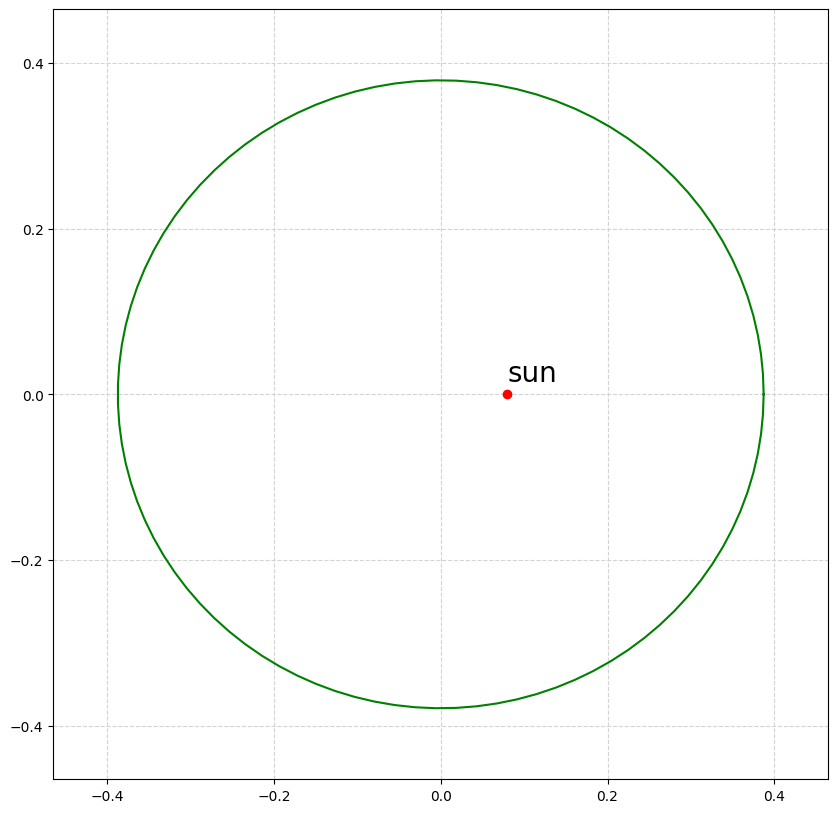

In [19]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.grid(color='lightgray',linestyle='--')
def axes():
    plt.axhline(0, alpha=.1)
    plt.axvline(0, alpha=.1)
if orbit_type == "ellipse" or orbit_type == "circle":
    b = a * (1- e ** 2) ** 0.5
    t = np.linspace(0, 2*math.pi, 100)
    plt.xlim([-1.2 * a, 1.2 * a])
    plt.ylim([-1.2 * a, 1.2 * a])
    plt.plot(a*np.cos(t) , b*np.sin(t), color = "green")
elif orbit_type == "parabola":
    x = np.linspace(0, 10 * a, 400)
    y = np.linspace(- 5 * a, 5 * a, 400)
    plt.xlim([-0.2 * a, 10.2 * a])
    plt.ylim([-5.2 * a, 5.2 * a])
    x, y = np.meshgrid(x, y)
    axes()
    plt.contour(x, y, (y**2 - 4*a*x), [0], colors='green')
else:
    b = a * math.sqrt(e ** 2 - 1)
    t = np.linspace(0, 2)
    plt.plot( a*np.cosh(t) , b*np.sinh(t) , color = "green")
    plt.plot( a*np.cosh(t) , -b*np.sinh(t) , color = "green")
    plt.plot( -a*np.cosh(t) , b*np.sinh(t) , color = "green")
    plt.plot( -a*np.cosh(t) , -b*np.sinh(t) , color = "green")
    plt.xlim([-1.2 * a * math.cosh(2), 1.2 * a* math.cosh(2)])
    plt.ylim([-1.2 * a * math.cosh(2), 1.2 * a * math.cosh(2)])

plt.plot(a * e,0,'ro', label = "sun")
plt.annotate("sun", (a * e, 0.04 * a), size = 20)
plt.show()

# Q2: Gram-Schmidt (40 Points)

The Gram-Schmidt process is a mathematical technique used to transform a set of linearly independent vectors into an orthogonal (or orthonormal) set of vectors. It is commonly used in linear algebra and numerical computations.

Now we want to implement Gram-Schmidt process so that given a set of linearly independent vectors $a_1, a_2, \cdots, a_k$, output should be orthonormal vectors $q_1, q_2, \cdots, q_k$ .


In [53]:
import numpy as np

def gram_schmidt(A: np.ndarray):
    """
    Perform the Gram-Schmidt process to convert the columns of matrix A into an orthonormal set of vectors.
    
    Parameters:
    A (np.ndarray): Input matrix with columns a_1, a_2, ..., a_k.
    
    Returns:
    np.ndarray: Matrix Q with orthonormal columns q_1, q_2, ..., q_k.
    """
    def vector_norm(v):
        return np.sqrt(sum(v_i * v_i for v_i in v))
    
    def vector_dot(u, v):
        return sum(u_i * v_i for u_i, v_i in zip(u, v))
    
    def vector_subtract(u, v):
        return np.array([u_i - v_i for u_i, v_i in zip(u, v)])
    
    def scalar_multiply(c, v):
        return np.array([c * v_i for v_i in v])
    
    num_vectors = A.shape[1]
    Q = np.zeros_like(A, dtype=float)
    
    for i in range(num_vectors):
        q = A[:, i]
        
        for j in range(i):
            proj = scalar_multiply(vector_dot(Q[:, j], A[:, i]), Q[:, j])
            q = vector_subtract(q, proj)
        
        norm = vector_norm(q)
        if norm == 0:
            raise ValueError("The input vectors are not linearly independent.")
        
        q = scalar_multiply(1.0 / norm, q)
        Q[:, i] = q
    
    return Q

# Example usage
A = np.array([[1, 1, 0],
              [1, 0, 1],
              [0, 1, 1]], dtype=float)

Q = gram_schmidt(A)
print("Orthonormal vectors (columns of Q):")
print(Q)


Orthonormal vectors (columns of Q):
[[ 0.70710678  0.40824829 -0.57735027]
 [ 0.70710678 -0.40824829  0.57735027]
 [ 0.          0.81649658  0.57735027]]


In [54]:
A1 = np.array([[5, -1, 12, 3], [2, -15, 4, 9], [2, -2, 7, -4], [0, 8, 1, 11]])
A2 = np.array([[1, 2, 0], [8, 1, -6], [-3, 12, 1]])

B1 = gram_schmidt(A1)
B2 = gram_schmidt(A2)

print("test 1:")
tester.gram_schmidt_test(A1, B1)
print("test 2:")
tester.gram_schmidt_test(A2, B2)

test 1:
Passed!
---------------
test 2:
Passed!
---------------


Now we want to visualise this process in 3D space. The `vector_plot` function takes a list of vectors and visualizes them in 3D space. Here’s how it works:

Input Parameters:

- <strong>tvects:</strong> A list of vectors (each represented as a 3-tuple or array).<br>
- <strong>is_vect:</strong> A boolean flag indicating whether the input vectors are true vectors (default is True).<br>
- <strong>orig:</strong> The origin point (default is [0, 0, 0]).<br>

Steps:

- Create a 6-tuple array (coords) to store the coordinates of the vectors.
<br>
- For each vector in tvects:
<br><br>
Extract the first and second 3-tuples to represent the beginning and end points of the vector.<br>
Use Scatter3d from Plotly to create a vector visualization with appropriate coloring, size, and other properties.<br>
Add the vector to the data list.<br>
<br>
- Set the layout for the 3D plot.
<br>
- Create the figure and display it using fig.show().

In [67]:
def vector_plot(tvects: np.ndarray, is_vect=True, orig=[0, 0, 0]):
    # Convert orig to a numpy array
    orig = np.array(orig)
    
    # Make a 6-tuple array for coords from the input vectors
    if is_vect:
        coords = [(orig, orig + vect) for vect in tvects]
    else:
        coords = tvects
    
    data = []
    
    for c in coords:
        # Extract the first and second 3-tuples to represent the beginning and end points of the vector
        begin, end = c
        
        # Create a vector using Scatter3d in plotly.graph_objs with coloring and size
        vector = go.Scatter3d(
            x=[begin[0], end[0]],
            y=[begin[1], end[1]],
            z=[begin[2], end[2]],
            mode='lines+markers',
            line=dict(color='blue', width=5),
            marker=dict(size=5, color='red')
        )
        
        # Add the vector to the data list
        data.append(vector)
    
    layout = go.Layout(
        margin=dict(l=4, r=4, b=4, t=4),
        scene=dict(
            xaxis=dict(range=[-1, 1]),
            yaxis=dict(range=[-1, 1]),
            zaxis=dict(range=[-1, 1])
        )
    )
    
    fig = go.Figure(data=data, layout=layout)
    fig.show()

In [68]:
A = [[1, -1, 1], [1, 0, 1], [1, 1, 2]]

print("Plot of inital vectors\n")
vector_plot(A)

B = gram_schmidt(np.array(A))
print("Matrix of orthonormal vectors : \n", B)
vector_plot(B)

Plot of inital vectors



Matrix of orthonormal vectors : 
 [[ 0.57735027 -0.70710678  0.40824829]
 [ 0.57735027  0.         -0.81649658]
 [ 0.57735027  0.70710678  0.40824829]]


# Q3: Change of Basis (40 Points)

Consider vector $v_a$ in basis $a_1, a_2, \cdots, a_n \in \mathbb{R}^n$, We want to find its representation $v_b$ in basis $b_1, b_2, \cdots, b_n \in \mathbb{R}^n$. $A$ is a $n\times n$ matrix with columns $a_1, a_2, \cdots, a_n$, $B$ is a matrix with columns $b_1, b_2, \cdots, b_n$ and we have the following relation between them: $$Av_a = Bv_b$$
By knowing the above equation, Implement a function which takes representation of a $v_a$ in basis $A$ and returns its representation in basis $B$.

In [90]:
import numpy as np

def gaussian_elimination(A):
    """ Perform Gaussian elimination to find the inverse of matrix A """
    n = len(A)
    A = A.astype(float)
    
    # Create an identity matrix of the same size as A
    I = np.eye(n)
    
    # Augment A with the identity matrix
    AI = np.hstack((A, I))
    
    # Perform Gaussian elimination
    for i in range(n):
        # Make the diagonal contain all 1's
        AI[i] = AI[i] / AI[i][i]
        
        # Make the other rows contain 0's
        for j in range(n):
            if i != j:
                AI[j] = AI[j] - AI[i] * AI[j][i]
    
    # Extract the right-hand matrix which is now the inverse
    A_inv = AI[:, n:]
    return A_inv

def basis_change(va: np.ndarray, A: np.ndarray, B: np.ndarray) -> np.ndarray:
    """
    va: vector in basis a_1, ..., a_n.
    A: basis matrix of vector va.
    B: new basis matrix.
    output: representation of vector va in new basis b_1, ..., b_n.
    """
    # Calculate the inverse of matrix B manually using Gaussian elimination
    B_inv = gaussian_elimination(B)
    
    # Calculate A * va
    Av = np.dot(A, va)
    
    # Calculate the new representation of the vector in basis B by multiplying B_inv * (A * va)
    vb = np.dot(B_inv, Av)
    
    return vb


Use the below block to test your code.

In [93]:
for s in range(1, 6):
    i = 3**s
    nA, mA = 3**s, 3**s
    nB, mB = 3**s, 3**s
    va = tester.vector_generator(i, 100)
    A = tester.matrix_generator(nA, mA, 10)
    B = tester.matrix_generator(nB, mB, 10)

    vb = basis_change(va, A, B)

    print("test " + str(s) + ": ")
    tester.change_of_basis_test(va, vb, A, B)

test 1: 
Passed!
---------------
test 2: 
Passed!
---------------
test 3: 
Passed!
---------------
test 4: 
Passed!
---------------
test 5: 
Passed!
---------------


Now we want to visualize our vectors. Implement a funciton which its input is a set of vectors and it draws the vectors in gridline using matplotlib. Vectors must be shown as arrows and your grid should be like the grids shown below. [This matplotlib function](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.quiver.html) may be useful in your implementation.


In [98]:
def plot_vectors(vectors):
    """
    vectors: list of vectors to plot.
    output: a gridline in which vectors are drawn as arrows.
    """
    # Calculate the scale based on the maximum absolute value in vectors
    max_val = max(max(abs(np.array(vectors).flatten())), 1)
    scale = max_val + 1  # Adding 1 for better visualization

    fig, ax = plt.subplots()
    
    # Set the grid and limits
    ax.set_xlim(-scale, scale)
    ax.set_ylim(-scale, scale)
    ax.grid(True)
    ax.set_aspect('equal')
    
    # Origin point for all vectors
    origin = np.array([[0, 0] for _ in range(len(vectors))])
    
    # Convert vectors to numpy array for easier manipulation
    vectors = np.array(vectors)
    
    # Use quiver to plot arrows
    ax.quiver(origin[:, 0], origin[:, 1], vectors[:, 0], vectors[:, 1], angles='xy', scale_units='xy', scale=1, color='r')
    
    plt.show()

Lets visualise two vector sets. these vectors are in standard basis.

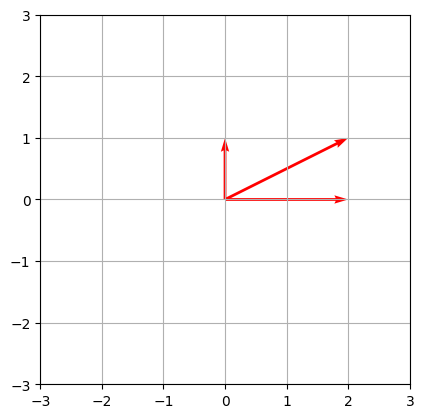

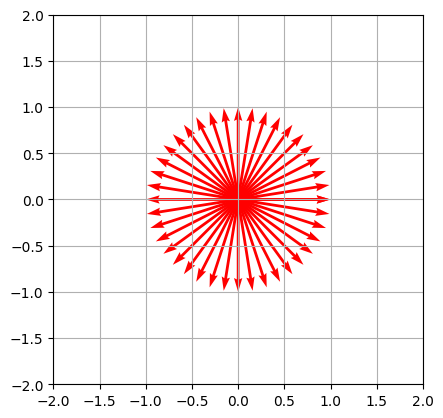

In [99]:
v1 = np.array([2,0])
v2 = np.array([0,1])
v3 = np.array([2,1])
vectors1 = [v1, v2, v3]

alpha = np.linspace(0, 2*np.pi, 41)
vectors2= list(zip(np.cos(alpha), np.sin(alpha)))

plot_vectors(vectors1)
plot_vectors(vectors2)

Change the basis of vector set 1 and 2 to basis $B_1$ and $B_2$ then visualize their representation in new basis.

In [100]:
B1 = np.array([[1, 1], [1, -1]])
B2 = np.array([[2, 1], [1, 2]]) / 2

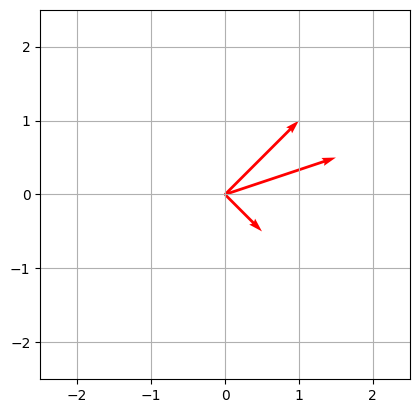

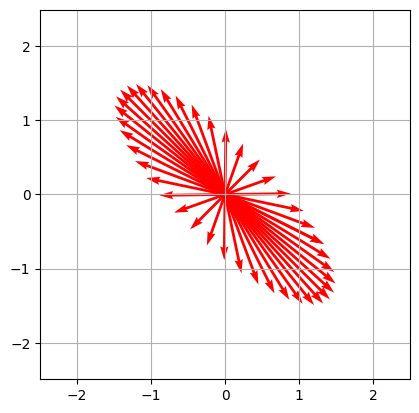

In [102]:
# TODO: write your code here
plot_vectors([basis_change(v, np.array([[1, 0], [0, 1]]), B1) for v in vectors1])
plot_vectors([basis_change(v, np.array([[1, 0], [0,1]]), B2) for v in vectors2])